LGBMRegressor
0.463
done in 0.177s
Lasso
-0.0
done in 0.006s
KNN
0.397
done in 0.469s
DT
-0.099
done in 0.097s
RF
0.451
done in 6.098s


Weight,Feature
0.9505 ± 0.0288,pickup_latitude
0.9396 ± 0.0114,dropoff_latitude
0.6247 ± 0.0127,pickup_longitude
0.5741 ± 0.0159,dropoff_longitude
-0.0014 ± 0.0031,passenger_count


done in 0.628s


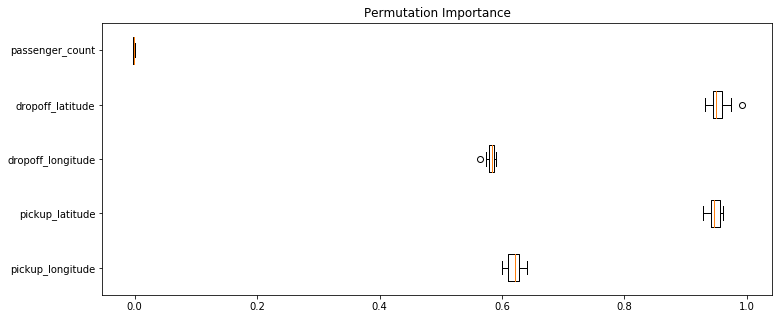

done in 1.508s



In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import seaborn as sns
from pdpbox import pdp, get_dataset, info_plots
import eli5
from IPython.display import display
from eli5.sklearn import PermutationImportance
from sklearn.inspection import plot_partial_dependence
import time

data = pd.read_csv("small_train.csv") # učitavanje podataka

# filtriranje podataka
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
'dropoff_longitude > -74 and dropoff_longitude < -73.9 and '
+'fare_amount > 0')

# odabir željenih značajki
feature_names = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']

X = data[feature_names] # pripemanje skupa značajki

y = data.fare_amount # pripremanje skupa  oznaka

# podjela skupa podataka na skup za treniranje i testiranje 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=1)

# stvaranje modela LightGBM regresora
tic = time.time()
regressor = LGBMRegressor(random_state=0, num_leaves=120) 
regressor.fit(X_train, y_train) # treniranje modela
print('LGBMRegressor')
print(round(regressor.score(X_test, y_test), 3)) # ispis točnosti
print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena


# stvaranje modela linearne regresije
tic = time.time()
reg_lin = linear_model.Lasso(alpha=0.05)
reg_lin.fit(X_train, y_train) # treniranje modela
print('Lasso')
print(round(reg_lin.score(X_test, y_test), 3)) # ispis točnosti
print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena

# stvaranje modela k najbližih susjeda
tic = time.time()
reg_KNN = KNeighborsRegressor()
reg_KNN.fit(X_train, y_train) # treniranje modela
print('KNN')
print(round(reg_KNN.score(X_test, y_test), 3)) # ispis točnosti
print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena


# stvaranje modela stabla odluke
tic = time.time()
reg_DT = DecisionTreeRegressor()
reg_DT.fit(X_train, y_train) # treniranje modela
print('DT')
print(round(reg_DT.score(X_test, y_test), 3)) # ispis točnosti
print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena

# stvaranje modela slučajne šuma
tic = time.time()
reg_RF = RandomForestRegressor()
reg_RF.fit(X_train, y_train) # treniranje modela
print('RF')
print(round(reg_RF.score(X_test, y_test), 3)) # ispis točnosti
print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena

# ispis tablice permutacijskih važnosti eli5
tic = time.time()
perm_importance = PermutationImportance(estimator = regressor, random_state=1).fit(X_test, y_test) 
display(eli5.show_weights(perm_importance, feature_names = X_test.columns.tolist()))
print("done in {:.3f}s".format(time.time() - tic))# ispis utrošenog vremena


# grafički prikaz permutacijskih važnosti sklearn.inspection
tic = time.time()
result = permutation_importance(estimator = regressor, X=X_test, y=y_test, n_repeats=10, random_state=42)
plt.figure(figsize=(12, 5))
plt.title('Permutation Importance')
plt.boxplot(x=result.importances.T, vert=False, labels = X_test.columns.tolist())
plt.show()

print("done in {:.3f}s".format(time.time() - tic))# ispis utrošenog vremena
print()

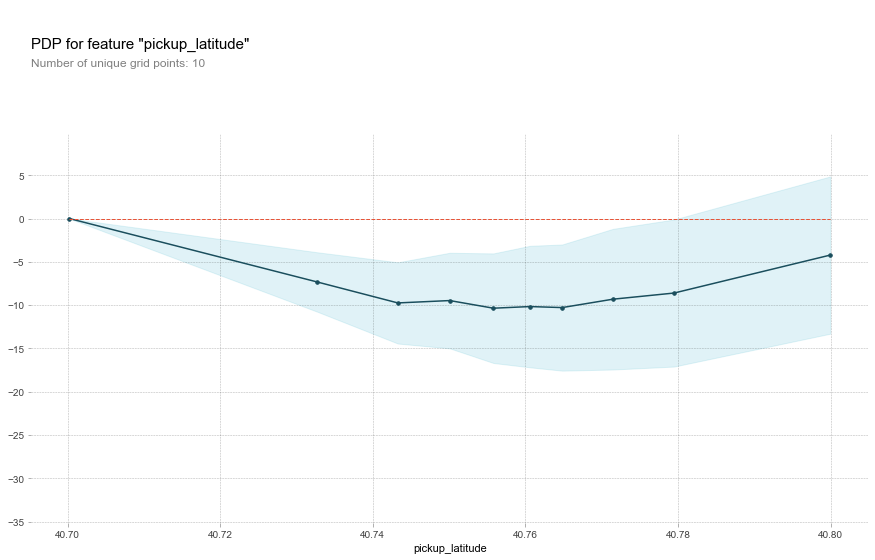

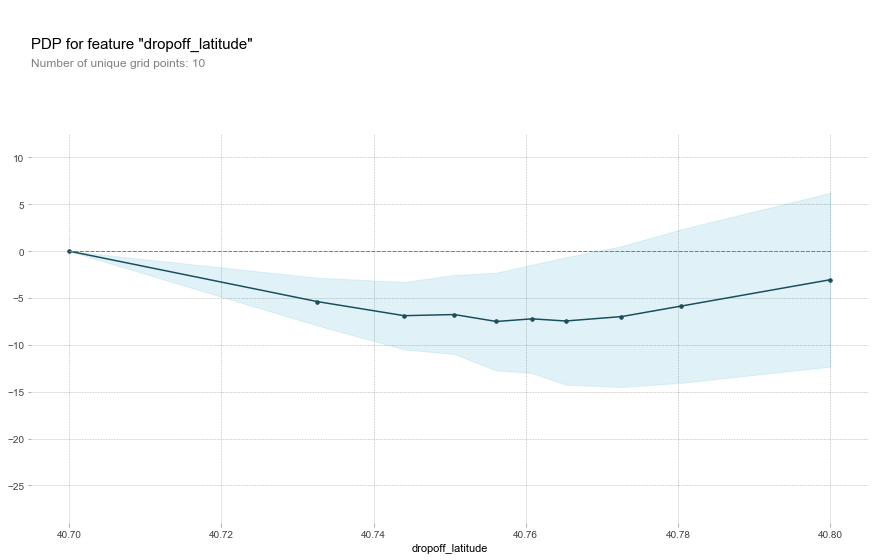

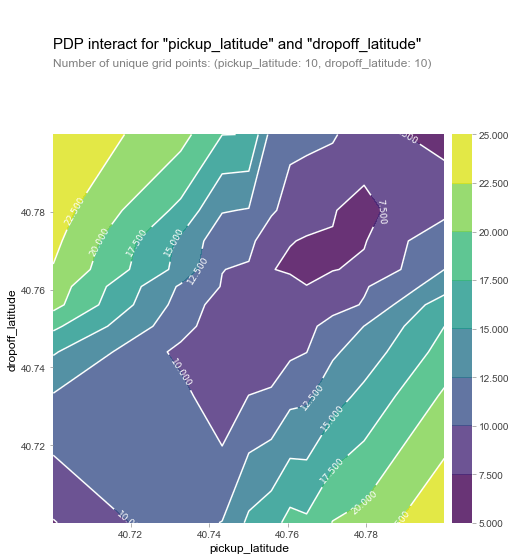

done in 5.673s


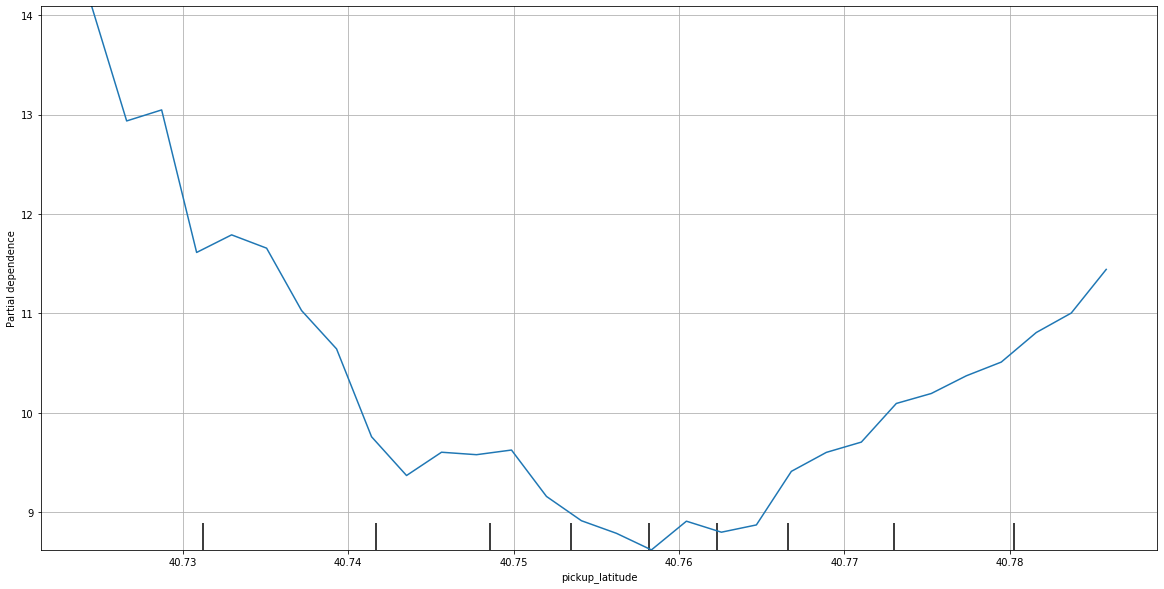

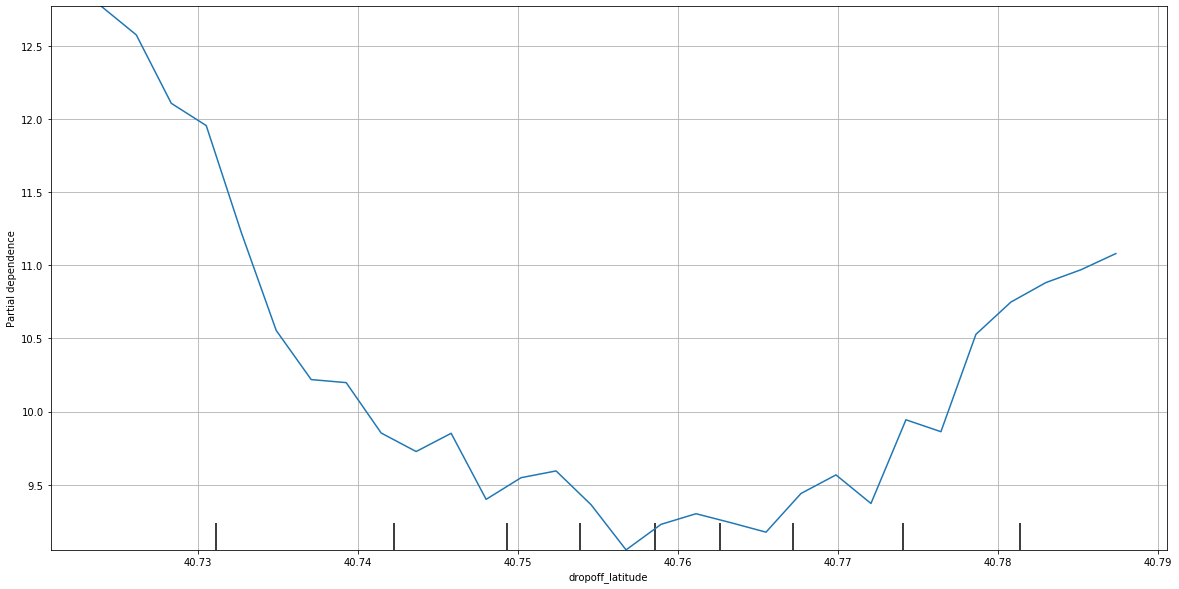

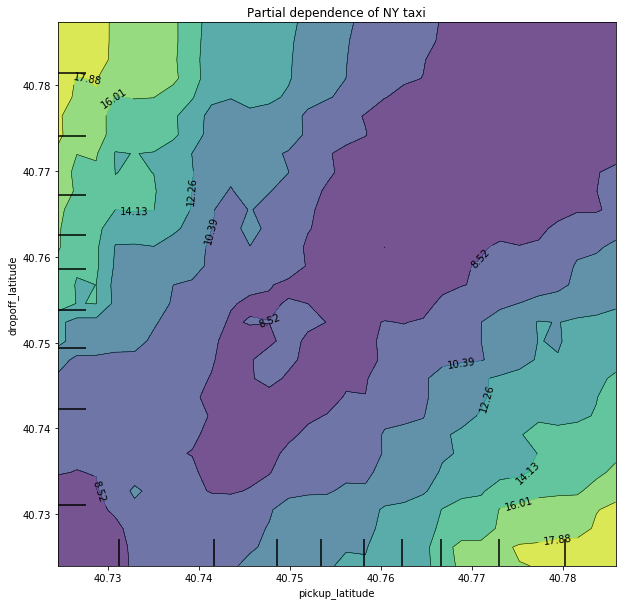

done in 30.945s


In [27]:
features_to_plot = ['pickup_latitude','dropoff_latitude']

# generiranje dijagrama djelomične ovisnosti za pojedinu značajku
# i za interakciju značajki pomoći programske knjižnice pdpbox
tic = time.time()
pdp_dist = pdp.pdp_isolate(model=regressor, dataset=X_test, model_features=feature_names, feature=features_to_plot[0])
pdp.pdp_plot(pdp_dist, features_to_plot[0])
plt.show()

pdp_dist = pdp.pdp_isolate(model=regressor, dataset=X_test, model_features=feature_names, feature=features_to_plot[1])
pdp.pdp_plot(pdp_dist, features_to_plot[1])
plt.show()

interation = pdp.pdp_interact(model=regressor, dataset=X_test, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=interation, feature_names =features_to_plot)
plt.show()

print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena

# generiranje dijagrama djelomične ovisnosti za pojedinu značajku 
# i za interakciju značajki pomoći programske knjižnice sklearn.inspection 
tic = time.time()
fig, ax = plt.subplots(figsize=(20, 10))
plot_partial_dependence(regressor, X_test, ['pickup_latitude'], grid_resolution=30, ax=ax)
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(20, 10))
plot_partial_dependence(regressor, X_test, ['dropoff_latitude'], grid_resolution=30, ax=ax)
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Partial dependence of NY taxi')
plot_partial_dependence(regressor, X_test, [('pickup_latitude','dropoff_latitude')], grid_resolution=30, ax=ax)
plt.show()
print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena

In [10]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
import shap

# stvaranje ShapKernel objašnjivača pomoću funkcije k-srednjih vrijednosti 
tic = time.time()
background=shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(model = regressor.predict, data=background) #B
shap_values = explainer.shap_values(X_test, nsamples=20)
print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena



  0%|          | 0/15645 [00:00<?, ?it/s]

done in 97.110s


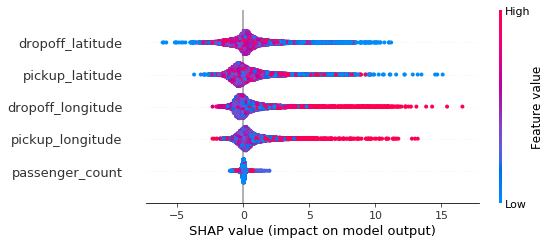

None

done in 1.007s


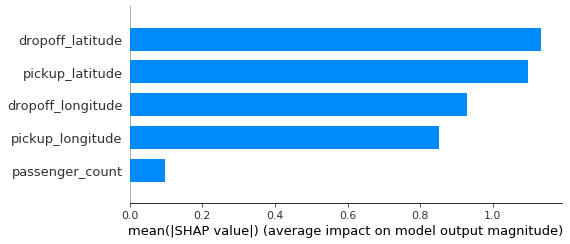

None

done in 0.094s


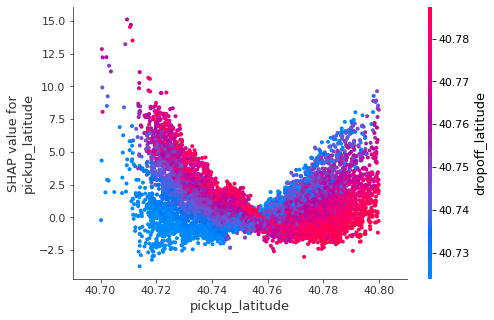

None

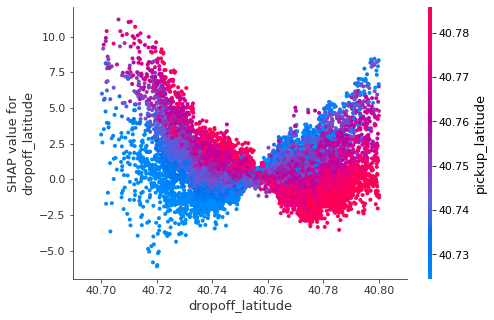

None

done in 0.816s


In [11]:
# prikaz permutacijskih važnosti dobivenih pomoću 
# SHAP-a pomoću točkastog dijagrama
tic = time.time()
display(shap.summary_plot(shap_values, X_test, plot_type="dot"))
print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena

# prikaz permutacijskih važnosti dobivenih pomoću 
# SHAP-a pomoću trakastog dijagrama
tic = time.time()
display(shap.summary_plot(shap_values, X_test, plot_type="bar"))
print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena

# prikaz dijagrama djelomične ovisnosti generiranih pomoću SHAP-a
tic = time.time()
display(shap.dependence_plot("pickup_latitude", shap_values, X_test))
display(shap.dependence_plot("dropoff_latitude", shap_values, X_test))
print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena

In [12]:
# stvaranje TreeShap objašnjivača 

tic = time.time()
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_test)
print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena

pd.DataFrame(shap_values,columns=X_test.columns) # ispis



Computing SHAP...
done in 5.335s


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-0.460100,-0.923535,-0.601725,-0.412032,0.010939
1,-0.169093,2.514792,-0.102272,4.174748,-0.438096
2,0.839575,0.960582,1.597361,0.993557,0.017864
3,-0.486200,-0.749711,-0.741556,-0.216750,0.000508
4,-0.377023,-1.455442,-0.689937,-1.187991,-0.009831
...,...,...,...,...,...
15640,-0.994149,-0.361278,-0.848300,-0.052899,0.074142
15641,-0.635075,-0.307436,-0.318172,-0.510315,-0.086553
15642,-0.091309,-0.828746,0.135190,-1.134561,0.008261
15643,-1.040423,-1.329681,-0.679344,-0.325020,-0.060824


In [13]:
# generiranje SHAP dijagrama koji pokazuje kako značajke utječu na 50. primjer 
tic = time.time()
display(shap.force_plot(explainer.expected_value, shap_values[50,:], X_test.iloc[50,:]))

print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena



done in 0.003s


In [14]:
# generiranje SHAP dijagrama koji pokazuje kako značajke utječu na prvih 5000 primjera 
tic = time.time()
display(shap.force_plot(explainer.expected_value, shap_values[0:5000,:], X_test))
print("done in {:.3f}s".format(time.time() - tic)) # ispis utrošenog vremena

done in 287.338s
